# Most In-Demand Skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

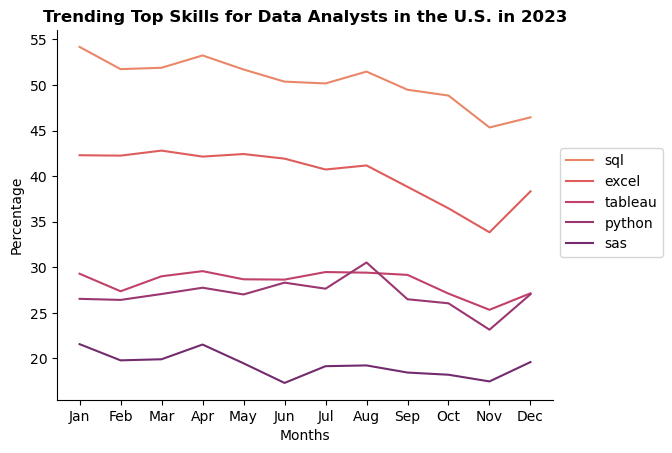

In [69]:
# Filter by country and role
df_da_us = df[(df["job_country"] == "United States") & (df["job_title_short"] == "Data Analyst")].copy()
# Add month column and turn list vales into indivual ones from "job_skills" column
df_da_us["month_no"] = df_da_us["job_posted_date"].dt.month
df_da_us_exp = df_da_us.explode("job_skills")
# Create pivot table and sorting it
df_da_us_pivot = df_da_us_exp.pivot_table(index="month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_da_us_pivot.loc["Total"] = df_da_us_pivot.sum()
df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc["Total"].sort_values(ascending=False).index]
df_da_us_pivot = df_da_us_pivot.drop("Total")

# Create table to use percentage values instead absolute ones
df_da_total_month = df_da_us.groupby("month_no").size()
df_da_us_per = df_da_us_pivot.div(df_da_total_month/100, axis=0)

# Change months from numeric values to names associated
df_da_us_per = df_da_us_per.reset_index("month_no")
df_da_us_per["month"] = df_da_us_per["month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_da_us_per = df_da_us_per.drop(columns="month_no")
df_da_us_per = df_da_us_per.set_index("month")

# Plotting
top = df_da_us_per.iloc[:, :5]
sns.lineplot(data=top, palette="flare", dashes=False)
sns.despine()
plt.title("Trending Top Skills for Data Analysts in the U.S. in 2023", weight="bold")
plt.ylabel("Percentage"), plt.xlabel("Months"), plt.legend(loc="upper left", bbox_to_anchor=(1, 0.7))
plt.show()